In [4]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import scipy.misc
import imageio

## Functions

In [200]:
def generate_perlin_noise_2d(shape, res):
    def f(t):
        return 6*t**5 - 15*t**4 + 10*t**3
    
    delta = (res[0] / shape[0], res[1] / shape[1])
    d = (shape[0] // res[0], shape[1] // res[1])
    grid = np.mgrid[0:res[0]:delta[0],0:res[1]:delta[1]].transpose(1, 2, 0) % 1
    # Gradients
    angles = 2*np.pi*np.random.rand(res[0]+1, res[1]+1)
    gradients = np.dstack((np.cos(angles), np.sin(angles)))
    g00 = gradients[0:-1,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g10 = gradients[1:  ,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g01 = gradients[0:-1,1:  ].repeat(d[0], 0).repeat(d[1], 1)
    g11 = gradients[1:  ,1:  ].repeat(d[0], 0).repeat(d[1], 1)
    # Ramps
    n00 = np.sum(np.dstack((grid[:,:,0]  , grid[:,:,1]  )) * g00, 2)
    n10 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1]  )) * g10, 2)
    n01 = np.sum(np.dstack((grid[:,:,0]  , grid[:,:,1]-1)) * g01, 2)
    n11 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1]-1)) * g11, 2)
    # Interpolation
    t = f(grid)
    n0 = n00*(1-t[:,:,0]) + t[:,:,0]*n10
    n1 = n01*(1-t[:,:,0]) + t[:,:,0]*n11
    return np.sqrt(2)*((1-t[:,:,1])*n0 + t[:,:,1]*n1)
        
def generate_fractal_noise_2d(shape, res, octaves=1, persistence=0.5):
    noise = np.zeros(shape)
    frequency = 1
    amplitude = 1
    for _ in range(octaves):
        noise += amplitude * generate_perlin_noise_2d(shape, (frequency*res[0], frequency*res[1]))
        frequency *= 2
        amplitude *= persistence
    return noise
    
if __name__ == '__main__':
    import matplotlib.pyplot as plt
    
    np.random.seed(0)
    noise = generate_perlin_noise_2d((256, 256), (8, 8))
    #plt.imshow(noise, cmap='gray', interpolation='lanczos')
    #plt.colorbar()
    
    np.random.seed(0)
    noise = generate_fractal_noise_2d((256, 256), (16, 16), 4)
    #plt.figure()
    #plt.imshow(noise, cmap='gray', interpolation='lanczos')
    #plt.colorbar()
    #plt.show()

def fractal_generator(persistence):
    perlin = generate_fractal_noise_2d((256,256), (2,2), octaves=8, persistence=persistence)
    img = Image.fromarray(perlin)
    np.median(perlin)
    for i in range(len(perlin)):
        for j in range(len(perlin)):
            if perlin[i][j] >= 0:
                perlin[i][j] = 1
            elif perlin[i][j] < 0:
                perlin[i][j] = -1
    return perlin

def increments (steps):
    steps = int(100/steps)
    a = range(0,100,steps)
    b = [x for x in a]
    c = b + [100]
    b.reverse()
    d = c + b
    e = [x/100 for x in d]
    return e

def FractalMorphing(imageA, imageB, steps):
    inter_matrix = []
    steps = increments(steps)
    imageA = Image.fromarray(imageA).convert('L') 
    imageB = Image.fromarray(imageB).convert('L') 
    for k in steps:
        PIL.Image.blend(imageA, imageB, k)
        outImage = np.asarray(imageA) * (1.0 - k) + np.asarray(imageB) * k
        inter_matrix.append(outImage)
        final_matrix = np.array(inter_matrix).T
    return final_matrix

In [201]:
image1 = fractal_generator(0.5)
image2 = fractal_generator(0.8)
InterpolMatrix = FractalMorphing(image1, image2, 20)

(256, 256, 41)

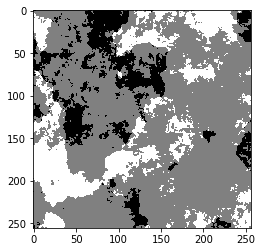

In [187]:
plt.imshow(InterpolMatrix[10], cmap='gray')